<a href="https://colab.research.google.com/github/Nidhi89717/ML/blob/main/06-Support-Vector-Machines/01_SVM_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring Support Vector Machines

## SVM - Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Data

The data shown here simulates a medical study in which mice infected with a virus were given various doses of two medicines and then checked 2 weeks later to see if they were still infected. Given this data, our goal is to create a classifcation model than predict (given two dosage measurements) if they mouse will still be infected with the virus.



In [3]:
df = pd.read_csv('gdrive/My Drive/csv_files/mouse_viral_study.csv')

In [4]:
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


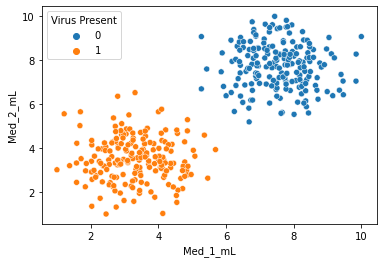

In [5]:
sns.scatterplot(x='Med_1_mL',y='Med_2_mL',hue='Virus Present',data=df);

## Separating Hyperplane

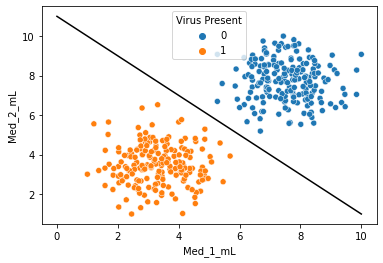

In [6]:
sns.scatterplot(x='Med_1_mL',y='Med_2_mL',hue='Virus Present',data=df);


# Hyperplane(2d line)
x = np.linspace(0,10,100)
m = -1
b = 11

y = m*x + b
plt.plot(x,y,'black');

## SVM - Support Vector Machine

In [7]:
from sklearn.svm import SVC

In [8]:
y = df['Virus Present']
x = df.drop('Virus Present',axis=1)

In [9]:
help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 

## Hyper Parameters

### C

Regularization parameter. The strength of the regularization is **inversely** proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.



In [10]:
model = SVC(kernel='linear', C = 1000)

In [11]:
model.fit(x,y)

SVC(C=1000, kernel='linear')

In [12]:
import sys
sys.path.insert(0,'/content/gdrive/MyDrive/csv_files')

from svm_margin_plot import plot_svm_boundary

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


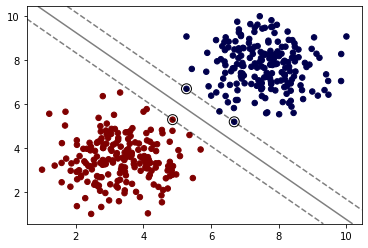

In [13]:
plot_svm_boundary(model,x,y);

In [14]:
model = SVC(kernel='linear',C=0.05)
model.fit(x,y)

SVC(C=0.05, kernel='linear')

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


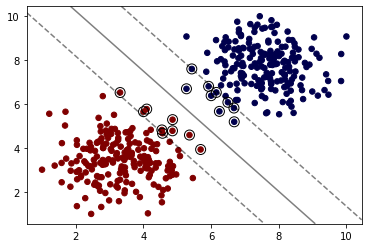

In [15]:
plot_svm_boundary(model,x,y)

### Kernel

[Choosing a Kernel](https://stats.stackexchange.com/questions/18030/how-to-select-kernel-for-svm?rq=1)

#### rbf - [Radial Basis Function](https://en.wikipedia.org/wiki/Radial_basis_function_kernel)


When training an SVM with the Radial Basis Function (RBF) kernel, two parameters must be considered: C and gamma. The parameter C, common to all SVM kernels, trades off misclassification of training examples against simplicity of the decision surface. A low C makes the decision surface smooth, while a high C aims at classifying all training examples correctly. gamma defines how much influence a single training example has. The larger gamma is, the closer other examples must be to be affected.

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


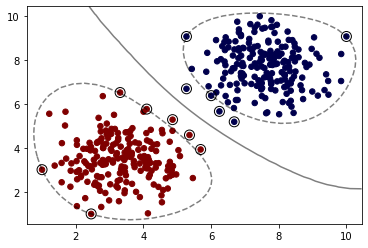

In [16]:
model = SVC(kernel='rbf',C=1)
model.fit(x,y)

plot_svm_boundary(model,x,y);

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


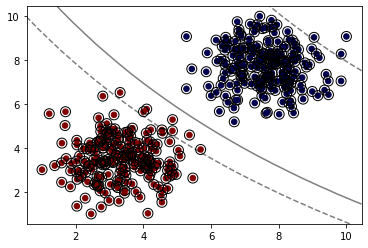

In [17]:
model = SVC(kernel='sigmoid')
model.fit(x,y)

plot_svm_boundary(model,x,y)

#### Degree (poly kernels only)

Degree of the polynomial kernel function ('poly').
Ignored by all other kernels.

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


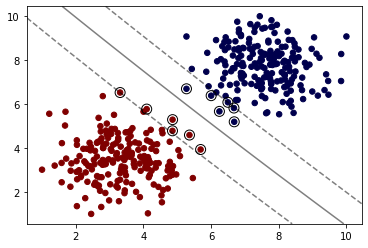

In [18]:
model = SVC(kernel='poly',degree=2,C=0.05)
model.fit(x,y)

plot_svm_boundary(model,x,y);

## Grid Search

In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
svm = SVC()
param_grid = {'C':[0.01,0.1,5],
              'kernel':['linear','rbf']}

In [22]:
grid = GridSearchCV(svm,param_grid)

In [23]:
grid.fit(x,y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 5], 'kernel': ['linear', 'rbf']})

In [25]:
grid.best_params_

{'C': 0.01, 'kernel': 'linear'}